In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rcParams.update({'font.size': 14})

In [4]:
TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'

In [5]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9990,10635,21,1.0,18.983962,11.419796,2.0,1,5.0,1967,0.194489,B,B,47,8004,3,125.0,3,5,B,112411.221700
9991,11173,6,2.0,62.648779,NaN,0.0,6,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,182625.548872
9992,11753,37,2.0,50.902724,27.159548,6.0,4,9.0,1972,0.127812,B,B,28,7287,5,320.0,1,3,B,196641.468817
9993,9289,1,3.0,84.486078,88.931509,0.0,4,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,264213.558631
9994,4356,9,1.0,43.303458,21.519087,8.0,12,14.0,1992,0.161532,B,B,25,5648,1,30.0,2,4,B,136744.340827
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


In [6]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [7]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4990,10158,46,2.0,46.288491,27.270795,6.0,7,9.0,1974,0.150818,B,B,16,3433,4,2643.0,4,5,B
4991,8252,47,2.0,48.107250,29.208798,6.0,5,9.0,1976,0.000070,B,B,46,10309,1,240.0,1,16,B
4992,8834,81,1.0,36.848987,23.489930,10.0,5,12.0,1970,0.006076,B,B,30,5285,0,645.0,6,6,B
4993,14676,6,1.0,48.435108,NaN,1.0,18,25.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
4994,13060,25,2.0,51.144906,48.979540,1.0,18,25.0,2015,0.069753,B,B,53,13670,4,NaN,1,11,B
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


In [8]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4990,10158,46,2.0,46.288491,27.270795,6.0,7,9.0,1974,0.150818,B,B,16,3433,4,2643.0,4,5,B
4991,8252,47,2.0,48.107250,29.208798,6.0,5,9.0,1976,0.000070,B,B,46,10309,1,240.0,1,16,B
4992,8834,81,1.0,36.848987,23.489930,10.0,5,12.0,1970,0.006076,B,B,30,5285,0,645.0,6,6,B
4993,14676,6,1.0,48.435108,NaN,1.0,18,25.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
4994,13060,25,2.0,51.144906,48.979540,1.0,18,25.0,2015,0.069753,B,B,53,13670,4,NaN,1,11,B
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


In [9]:
print('Строк в трейне:', train_df.shape[0])
print('Строк в тесте', test_df.shape[0])

Строк в трейне: 10000
Строк в тесте 5000


### Уменьшение объема памяти

In [10]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [11]:
train_df = reduce_mem_usage(train_df)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%


In [12]:
test_df = reduce_mem_usage(test_df)

Memory usage of dataframe is 0.72 MB
Memory usage after optimization is: 0.22 MB
Decreased by 70.3%


In [13]:
train_df.dtypes

Id                  int16
DistrictId          int16
Rooms             float32
Square            float32
LifeSquare        float32
KitchenSquare     float32
Floor                int8
HouseFloor        float32
HouseYear           int32
Ecology_1         float32
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Healthcare_1      float32
Helthcare_2          int8
Shops_1              int8
Shops_2          category
Price             float32
dtype: object

In [14]:
test_df.dtypes

Id                  int16
DistrictId          int16
Rooms             float32
Square            float32
LifeSquare        float32
KitchenSquare     float32
Floor                int8
HouseFloor        float32
HouseYear           int16
Ecology_1         float32
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Healthcare_1      float32
Helthcare_2          int8
Shops_1              int8
Shops_2          category
dtype: object

### EDA 
#### Распределение целевой переменной

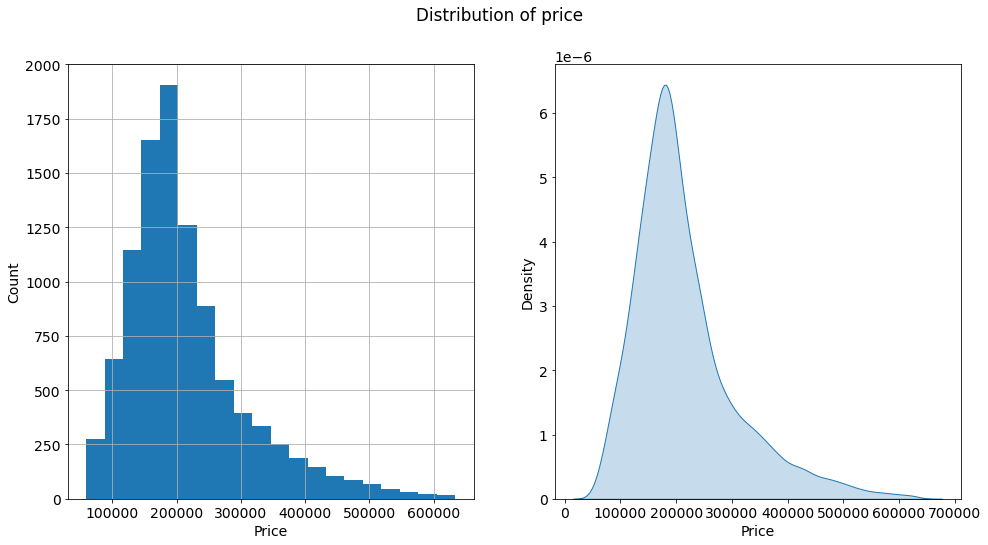

In [15]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
train_df['Price'].hist(density=False, bins=20)
plt.ylabel('Count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(train_df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of price')
plt.show()

In [16]:
target_mean = round(train_df['Price'].mean(), 2)
target_median = train_df['Price'].median()
target_mode = train_df['Price'].mode()[0]
print(f"mean = {target_mean}, median = {target_median}, mode = {target_mode}")

mean = 214138.94, median = 192269.65625, mode = 182938.078125


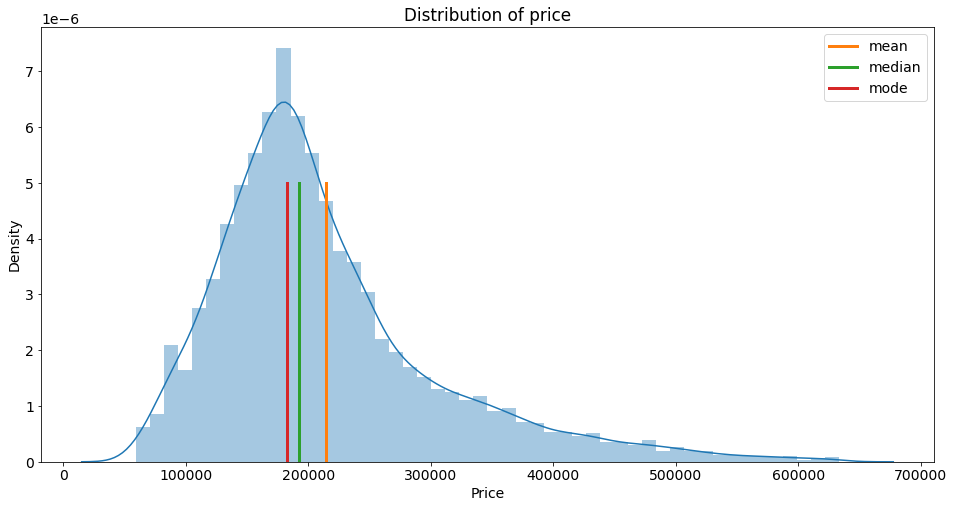

In [17]:
plt.figure(figsize = (16, 8))

sns.distplot(train_df['Price'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean',  linewidth=3)
plt.plot([target_median] * 10, y, label='median',  linewidth=3)
plt.plot([target_mode] * 10, y, label='mode', linewidth=3)

plt.title('Distribution of price')
plt.legend()
plt.show()

### Анализ признаков
##### Количественные признаки

##### Описание датасета

Id - идентификационный номер квартиры

DistrictId - идентификационный номер района

Rooms - количество комнат

Square - площадь

LifeSquare - жилая площадь

KitchenSquare - площадь кухни

Floor - этаж

HouseFloor - количество этажей в доме

HouseYear - год постройки дома

Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности

Social_1, Social_2, Social_3 - социальные показатели местности

Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья

Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров

Price - цена квартиры


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

In [19]:
df_num_features = train_df.select_dtypes(include=['int32', 'float32', 'float16', 'int8', 'int16'])
df_num_features.drop('Price', axis=1, inplace=True)
df_num_features.drop('Id', axis=1, inplace=True)
df_num_features.drop('DistrictId', axis=1, inplace=True)

In [20]:
df_num_features

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
0,3.0,115.027313,NaN,10.0,4,10.0,2014,0.075424,11,3097,0,NaN,0,0
1,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,30,6207,1,1183.0,1,0
2,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,33,5261,0,240.0,3,1
3,1.0,40.409908,NaN,1.0,10,22.0,1977,0.007122,1,264,0,NaN,0,1
4,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,33,8667,2,NaN,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,49.090729,33.272625,6.0,3,12.0,1981,0.300323,52,10311,6,NaN,1,9
9996,2.0,64.307686,37.038422,9.0,13,0.0,1977,0.072158,2,629,1,NaN,0,0
9997,1.0,29.648056,16.555363,5.0,3,5.0,1958,0.460556,20,4386,14,NaN,1,5
9998,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,47,8004,3,125.0,3,5


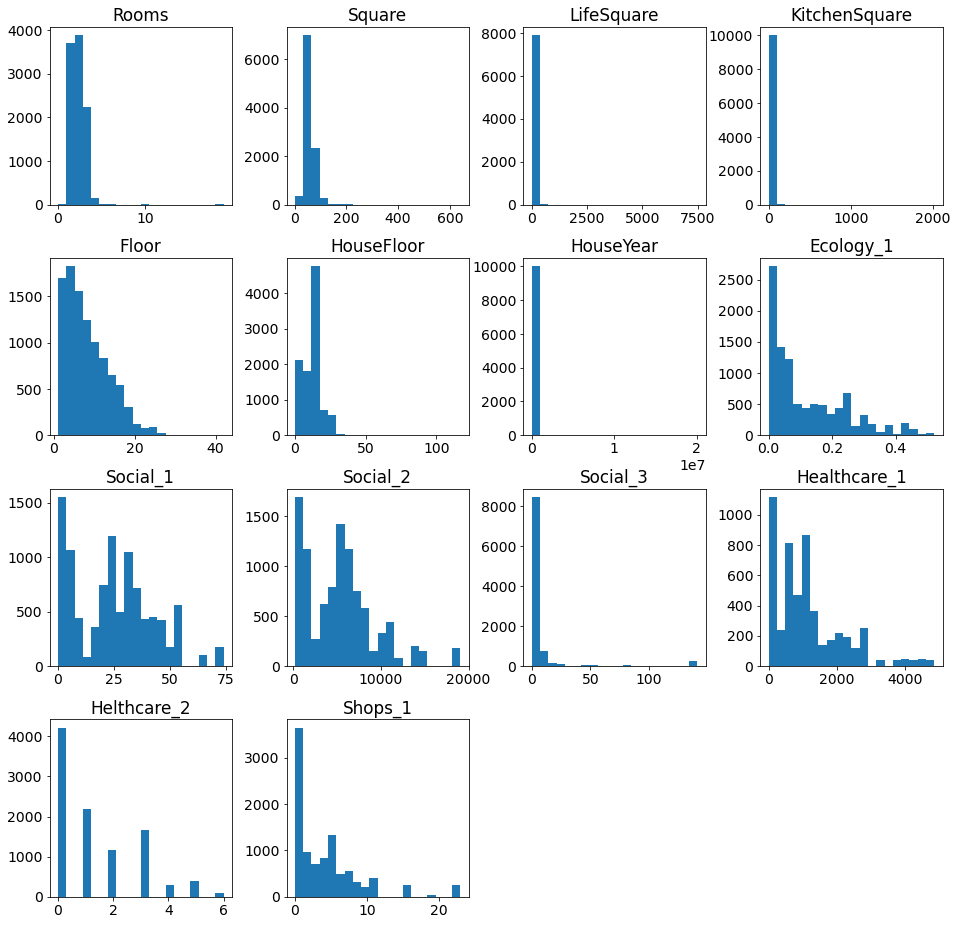

In [21]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

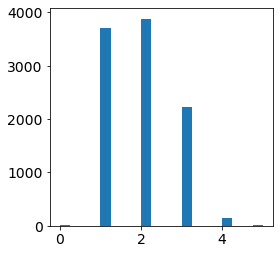

In [22]:
train_df.loc[train_df['Rooms'] < 6, 'Rooms'].\
    hist(figsize=(4,4), bins=20, grid=False);

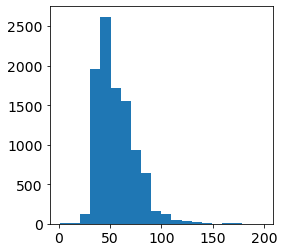

In [23]:
train_df.loc[train_df['Square'] < 200, 'Square'].\
    hist(figsize=(4,4), bins=20, grid=False);

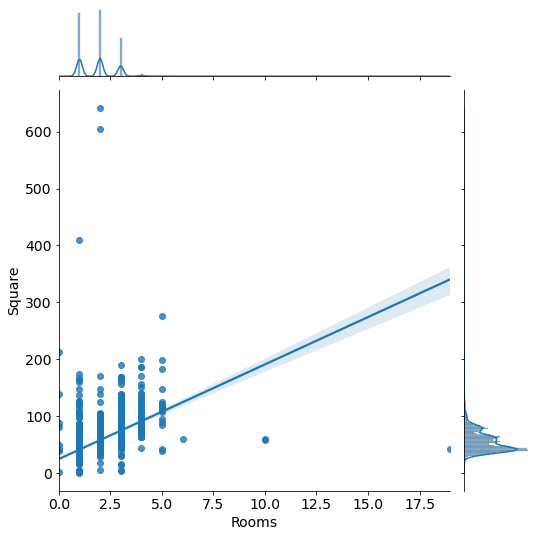

In [24]:
grid = sns.jointplot(train_df['Rooms'], train_df['Square'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

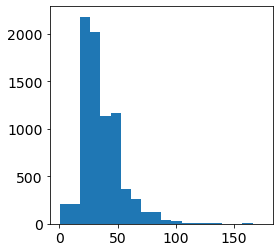

In [25]:
train_df.loc[train_df['LifeSquare'] < 200, 'LifeSquare'].\
    hist(figsize=(4,4), bins=20, grid=False);

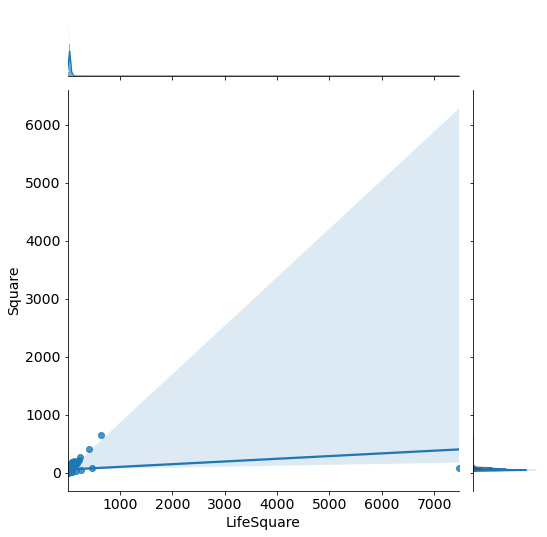

In [26]:
grid = sns.jointplot(train_df['LifeSquare'], train_df['Square'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

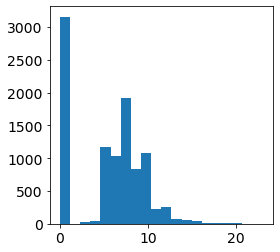

In [27]:
train_df.loc[train_df['KitchenSquare'] < 25, 'KitchenSquare'].\
    hist(figsize=(4,4), bins=20, grid=False);

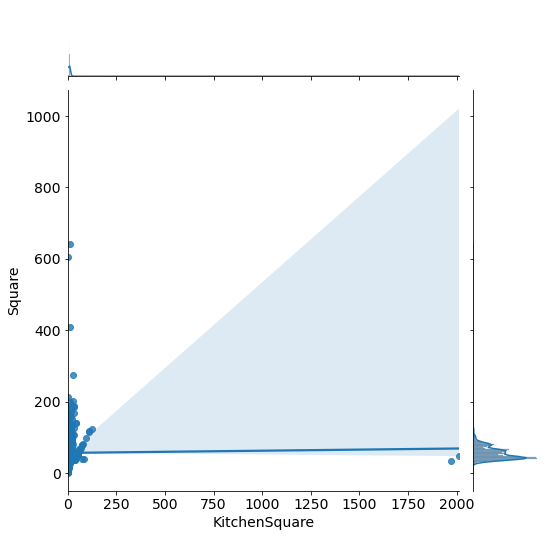

In [28]:
grid = sns.jointplot(train_df['KitchenSquare'], train_df['Square'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

#### Категориальные и бинарные признаки

In [29]:
df_obj_features = train_df.select_dtypes(include=['category'])
df_obj_features

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B
...,...,...,...
9995,B,B,B
9996,B,B,A
9997,B,B,B
9998,B,B,B


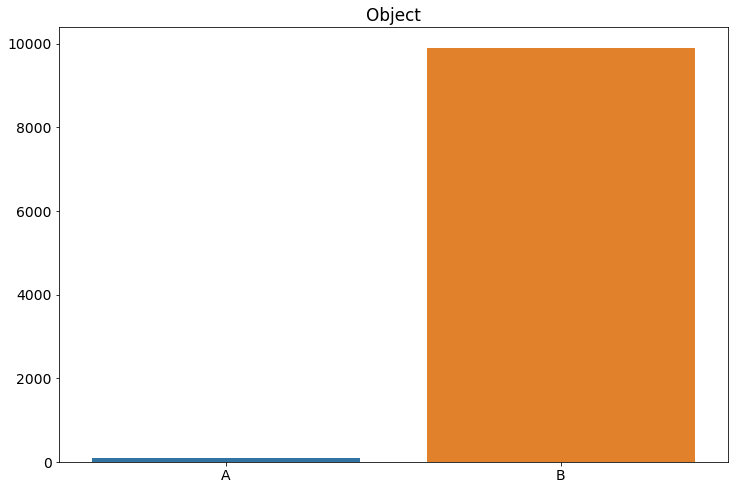

In [30]:
counts = df_obj_features['Ecology_2'].value_counts()
    
plt.figure(figsize=(12,8))    
plt.title('Object')
sns.barplot(counts.index, counts.values)
    
plt.show()

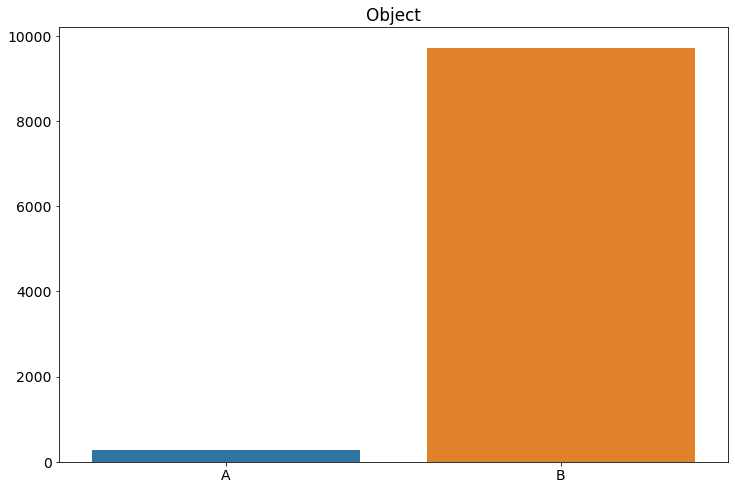

In [31]:
counts = df_obj_features['Ecology_3'].value_counts()
    
plt.figure(figsize=(12,8))    
plt.title('Object')
sns.barplot(counts.index, counts.values)
    
plt.show()

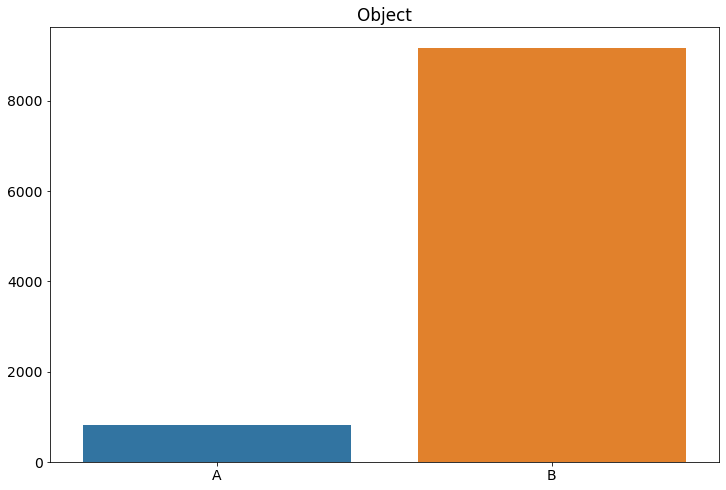

In [32]:
counts = df_obj_features['Shops_2'].value_counts()
    
plt.figure(figsize=(12,8))    
plt.title('Object')
sns.barplot(counts.index, counts.values)
    
plt.show()

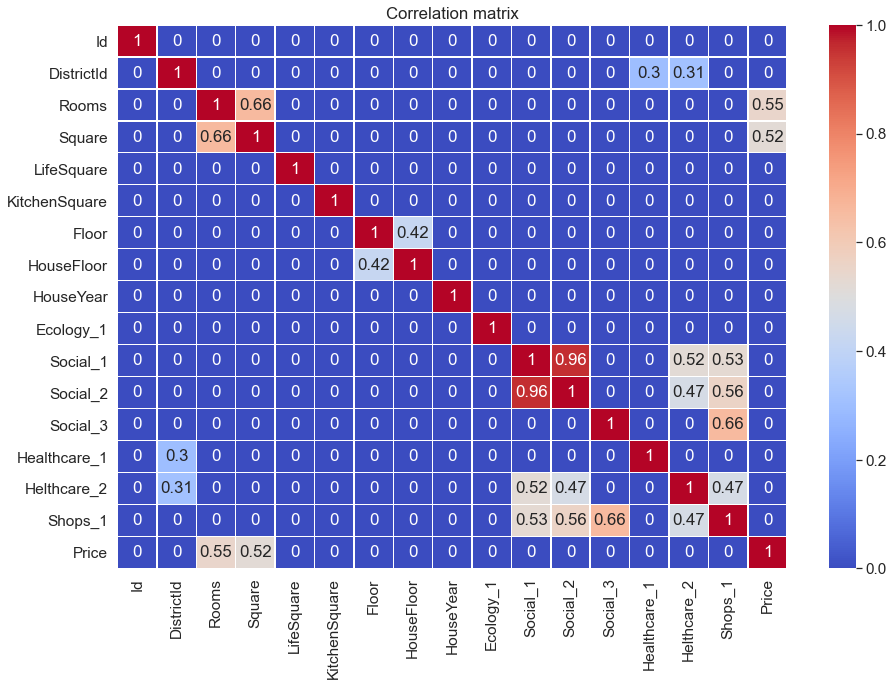

In [33]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = train_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm', color= 'white')

plt.title('Correlation matrix')
plt.show()

## Анализ зависимости таргета от фичей

### Количественные признаки

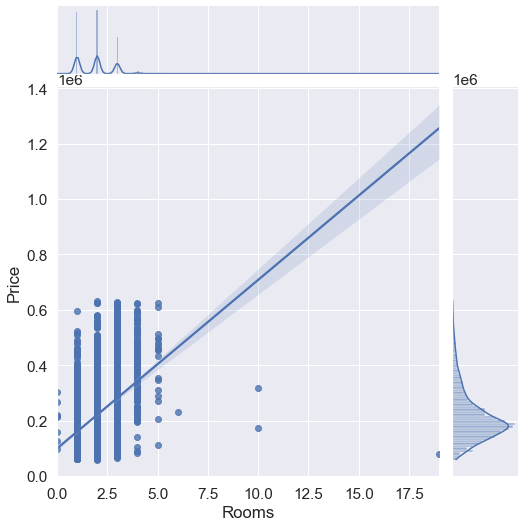

In [34]:
grid = sns.jointplot(train_df['Rooms'], train_df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

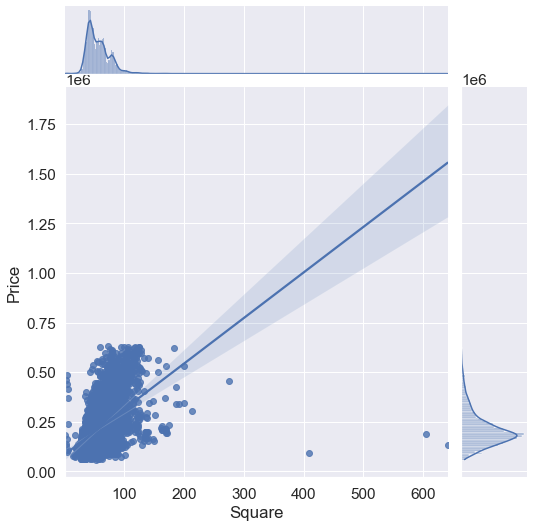

In [35]:
grid = sns.jointplot(train_df['Square'], train_df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

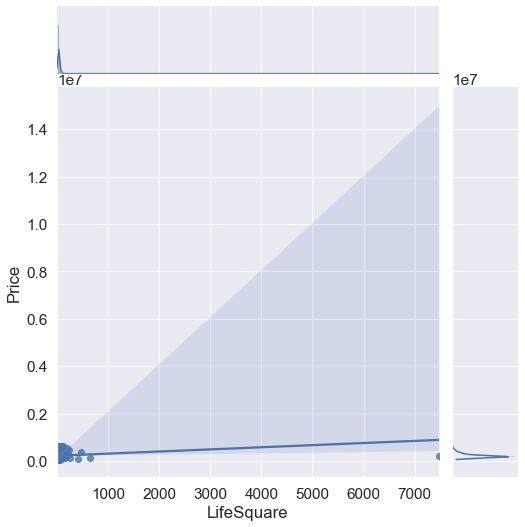

In [36]:
grid = sns.jointplot(train_df['LifeSquare'], train_df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

# Обработка данных

In [37]:
class DataPreprocessor:
    def __init__(self):
        self.medians = None
        self.kitchen_square_max_value = None
        self.kitchen_square_min_value = None
        self.life_square_min_value = None
        self.max_floor = None
        self.districts_healthcare = None


        
    def fit(self, df):
        # Medians and quantiles
        self.medians = df.median() # medians
        self.kitchen_square_max_value = np.quantile(df['KitchenSquare'], q=0.999) 
        self.kitchen_square_min_value = np.quantile(df['KitchenSquare'], q=0.001) 
        self.life_square_min_value = np.quantile(df['LifeSquare'], q=0.03) 
        self.max_floor = df['Floor'].max()
        
        
        # Compute mean Helthcare_1 value in each district
        self.districts_healthcare = df.groupby(['DistrictId'])['Healthcare_1'].agg('mean').to_dict()


    def transform(self, df):
#         Mediana 
        df.loc[(df['Square'] > 220) | (df['Square'] < 10 ), 'Square'] = df['Square'].median()
        df.loc[df['KitchenSquare'] > 30, 'KitchenSquare'] = df['KitchenSquare'].median()
        
#         LifeSquare 
        df['LifeSquare'].fillna(((df['Square'] - df['KitchenSquare']) - df['Square']*0.2), inplace=True)

#         Rooms    
        df['Rooms'].fillna(self.medians.Rooms, inplace=True)
        df.loc[(df['Rooms'] > 10) | ( df['Rooms'] < 1 ), 'Rooms'] = df['Rooms'].median()
        
#         Compute median room square and fill outliers with LifeSquare/Room_square 
        condition_rooms = (df['Rooms'] > 6) | (df['Rooms'] == 0)   
        room_sq = np.round((self.medians.LifeSquare / self.medians.Rooms, 1))[0]
        df.loc[condition_rooms , 'Rooms'] = df.loc[condition_rooms, 'LifeSquare'] / room_sq
        
#         Square
        df['Square'], df['LifeSquare'] = np.where(df['Square'] < df['LifeSquare'],(df['LifeSquare'],df['Square']), (df['Square'],df['LifeSquare']))

#         Ecology and Shops in binary
        df.replace({'Ecology_2': {'A': 0, 'B': 1}}, inplace=True)
        df.replace({'Ecology_3': {'A': 0, 'B': 1}}, inplace=True)
        df.replace({'Shops_2': {'A': 0, 'B': 1}}, inplace=True)
        
#         HouseFloor < Floor
        house_floor_condition = df['HouseFloor'] < df['Floor']
        df.loc[house_floor_condition, 'HouseFloor'] = df.loc[house_floor_condition, 'Floor']

#         HouseYear
        current_year = datetime.now().year
        condition_year = (df['HouseYear'] > current_year)
        df.loc[condition_year, 'HouseYear'] = self.medians.HouseYear
                
#         Healthcare
#         Fillna with dictrict healthcare value. (If district has no healthcare value fill with medians)      
        df.loc[df['Healthcare_1'].isna(), 'Healthcare_1'] = df['DistrictId'].map(self.districts_healthcare)
        df['Healthcare_1'].fillna(self.medians.Healthcare_1, inplace=True)       
#         Clip on upper quantille
        q_max = np.quantile(df['Healthcare_1'], q=0.9)
        df['Healthcare_1'].clip(upper=q_max, axis=0, inplace=True)
        
#         Drop Id
        df.drop(['Id'], axis=1, inplace=True)
        
#         Fillna just in case
        df.fillna(self.medians, inplace=True)
        return df

In [41]:
preprocessor = DataPreprocessor()
preprocessor.fit(train_df)
train_df = preprocessor.transform(train_df)
test_df = preprocessor.transform(test_df)

In [42]:
train_df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.888866,57.208267,38.204330,5.698700,8.526700,13.435700,1984.863800,0.118858,0.990300,0.972500,24.687000,5352.157400,8.039200,943.884094,1.319500,4.231300,0.917500,214138.937500
std,43.587592,0.812093,77.086082,17.712637,3.934454,5.241148,6.094054,18.409979,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,726.368347,1.493601,4.806341,0.275139,92872.273438
min,0.000000,1.000000,15.988890,0.370619,0.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,20.000000,1.000000,41.887622,24.940082,1.000000,4.000000,9.000000,1974.000000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,240.000000,0.000000,1.000000,1.000000,153872.628906
50%,36.000000,2.000000,52.621649,34.461567,6.000000,7.000000,14.000000,1977.000000,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192269.648438
75%,75.000000,2.000000,66.002323,47.447360,9.000000,12.000000,17.000000,2001.000000,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,1322.000000,2.000000,6.000000,1.000000,249135.460938
max,209.000000,6.000000,7480.592285,211.231125,30.000000,42.000000,117.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,2300.000000,6.000000,23.000000,1.000000,633233.437500


In [43]:
test_df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,51.279200,1.907800,56.615532,38.247128,5.705600,8.632000,13.395000,1984.392600,0.119874,0.990400,0.970200,24.933800,5406.900000,8.262600,952.321594,1.31940,4.242800,0.917600
std,44.179466,0.810094,19.052042,17.300905,3.836715,5.483228,6.231921,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,735.926086,1.47994,4.777365,0.275001
min,0.000000,1.000000,13.305532,0.333490,0.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,21.000000,1.000000,42.047523,25.203537,1.000000,4.000000,9.000000,1973.000000,0.019509,1.000000,1.000000,6.000000,1564.000000,0.000000,240.000000,0.00000,1.000000,1.000000
50%,37.000000,2.000000,52.933733,34.641788,6.000000,7.000000,14.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,1.000000
75%,77.000000,2.000000,66.416185,47.665981,9.000000,12.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,36.000000,7287.000000,5.000000,1322.000000,2.00000,6.000000,1.000000
max,212.000000,6.000000,303.071106,168.729034,30.000000,78.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,2300.000000,6.00000,23.000000,1.000000


# Построение модели

In [44]:
y = pd.DataFrame(data=train_df['Price'])
train_df.drop('Price', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.15, random_state=100)

In [45]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=7,
                                     min_samples_leaf=10,
                                     random_state=42,  
                                     n_estimators=250, 
                                     learning_rate=0.025)

gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)
y_test_preds = gb_model.predict(X_test)
print(r2(y_train, y_train_preds))
print(r2(y_test, y_test_preds))

0.8717557188898789
0.7505483653441378


### Предсказание и сохранение

In [46]:
test_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,44,1.0,36.847630,19.094183,5.0,5,9.0,1970.0,0.036122,1,1,24,4378,0,1036.0,1,1,1
1,62,1.0,42.568134,42.493908,10.0,7,17.0,2017.0,0.072158,1,1,2,629,1,2300.0,0,0,0
2,27,2.0,59.463676,38.570942,9.0,19,19.0,1977.0,0.211401,1,1,9,1892,0,900.0,0,1,1
3,23,3.0,49.646030,33.893826,6.0,2,2.0,1965.0,0.014073,1,1,2,475,0,0.0,0,0,1
4,74,1.0,53.837055,42.069645,1.0,8,17.0,1977.0,0.309479,1,1,35,7715,4,990.0,0,6,1


In [47]:
X_train.head(5)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
3898,9,3.0,77.400513,47.487366,10.0,13,17.0,1993.0,0.069753,1,1,53,13670,4,30.0,1,11,1
9112,27,3.0,82.519600,65.015678,1.0,6,12.0,1977.0,0.017647,1,1,2,469,0,900.0,0,0,1
9296,57,1.0,42.159000,20.828892,8.0,8,12.0,2006.0,0.133215,1,1,49,11395,3,1406.0,3,4,0
4508,45,2.0,46.224003,34.399372,5.0,3,5.0,1962.0,0.014423,1,1,19,3806,4,900.0,0,3,1
6833,27,3.0,82.489098,51.510559,1.0,12,12.0,2018.0,0.072158,1,1,2,629,1,900.0,0,0,0


In [48]:
submit = pd.read_csv('./sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [49]:
predictions = gb_model.predict(test_df)
predictions

array([165537.78376281, 117960.98578382, 148108.60137517, ...,
       145376.75447074, 189557.21390208, 276698.2510772 ])

In [50]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,165537.783763
1,5925,117960.985784
2,960,148108.601375
3,3848,97708.812005
4,746,206682.550367


In [51]:
submit.shape

(5000, 2)

In [52]:
submit.to_csv('gb_submit.csv', index=False)